Is there a relationship between gross income for a movie and rating or public perception?

If a movie is on more streaming platforms, will it have higher ratings?

scipy stats correlation

# Do better rated movies receive more awards/nominations?

In [1]:
import pandas as pd
import numpy as np

In [2]:
awards = pd.read_csv('oscars.csv')
awards = awards[['Award', 'Winner', 'Name']]
awards = awards.rename(columns={"Name": "title", "Award":"award", "Winner":"winner"})
display(awards.head())

,award,winner,title
0,Actor,NaN,Richard Barthelmess
1,Actor,1.0,Emil Jannings
2,Actress,NaN,Louise Dresser
3,Actress,1.0,Janet Gaynor
4,Actress,NaN,Gloria Swanson


In [3]:
movies = pd.read_csv('imdb.csv')
movies = movies[['title', 'avg_vote']]
display(movies.head())

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,title,avg_vote
0,Miss Jerry,5.9
1,The Story of the Kelly Gang,6.1
2,Den sorte drøm,5.8
3,Cleopatra,5.2
4,L'Inferno,7.0


In [21]:
merged = movies.merge(awards, how='inner', on='title')
def nan_fix(df):
    if str(df) == 'nan':
        return 1
    if df == 1.0:
        return 2
    else:
        return 0
merged['winner'] = merged['winner'].apply(nan_fix)
display(merged.head())

# will it be a problem if we have movies with the same name? or is it find since it counts it as two different movies?

# compare the movies that were nominated vs. not nominated

,title,avg_vote,award,winner
0,Cinderella,6.0,Costume Design,1
1,Cinderella,5.6,Costume Design,1
2,Sis Hopkins,5.9,Art Direction (Black and White),1
3,Bill and Coo,5.6,Special Award,2
4,Monsieur Vincent,7.0,Special Foreign Language Film Award,2


In [22]:
won = merged[merged['winner'] == 1]
avg_rating_won = won['avg_vote'].agg(np.mean)
avg_rating_won

6.79811320754717

In [6]:
lost = merged[merged['winner'] == 0]
avg_rating_lost = lost['avg_vote'].agg(np.mean)
avg_rating_lost

nan

In [7]:
plotting = merged[['avg_vote', 'winner']]
plotting = plotting.groupby('winner').agg(np.mean)
plotting = plotting.reset_index()
plotting

,winner,avg_vote
0,no,6.798113
1,yes,6.800000


In [8]:
import matplotlib.pyplot as plt

In [9]:
# ax = plotting.plot.bar(x='winner', y='avg_vote', rot=0, ylim = (6.79,6.8), color = 'darkolivegreen')
# ax

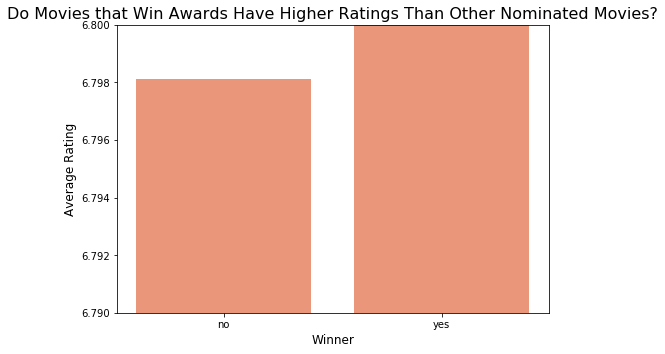

In [10]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
x = plotting['winner']
y = plotting['avg_vote']
ax1.bar(x,y, color='darksalmon')
ax1.set_xlabel('Winner', fontsize=12)
ax1.set_ylabel('Average Rating', fontsize=12)
ax1.set_ylim(6.79, 6.8)
ax1.set_title('Do Movies that Win Awards Have Higher Ratings Than Other Nominated Movies?', fontsize=16)
plt.show()

In [86]:
# imdb rating vs. rotten tomatoes rating
# user vs critic

m = pd.read_csv('imdb.csv')
m['date_published'] = pd.to_datetime(m['date_published'], errors = 'coerce')
m_golden = m[(m['date_published']>'1927-01-01')&(m['date_published']<'1969-12-31')]
m_golden = m_golden[['original_title', 'avg_vote', 'metascore']].rename(columns={'original_title':'title'})
m_golden.dropna().head()

,title,avg_vote,metascore
506,Metropolis,8.3,98.0
566,The Jazz Singer,6.5,66.0
628,The Circus,8.1,90.0
714,The Cocoanuts,7.0,69.0
786,Piccadilly,7.1,89.0


In [100]:
a = pd.read_csv('oscars.csv')
a = a[['Winner', 'Film']]
a['Winner'] = a['Winner'].apply(nan_fix)
a = a.rename(columns={"Film": "title"})

# golden age of film df
merge_golden = m_golden.merge(a, how='left', on = 'title')
merge_golden = merge_golden.dropna(subset=['metascore'])
merge_golden['Winner'] = merge_golden['Winner'].fillna(0)

merge_golden = merge_golden.groupby('title').agg(np.mean)
merge_golden.head()

,avg_vote,metascore,Winner
title,,,
12 Angry Men,8.9,96.0,0.0
13 Ghosts,6.1,56.0,0.0
"20,000 Leagues Under the Sea",7.2,83.0,0.0
2001: A Space Odyssey,8.3,84.0,0.0
42nd Street,7.4,83.0,0.0


In [105]:
m_home = m[(m['date_published']>'1980-01-01')&(m['date_published']<'2000-12-31')]
m_home = m_home[['original_title', 'avg_vote', 'metascore']].rename(columns={'original_title':'title'})
m_home.dropna().head()

,title,avg_vote,metascore
16013,El espíritu de la colmena,7.9,87.0
17454,Eraserhead,7.4,87.0
17546,The Killing of a Chinese Bookie,7.4,65.0
18048,The Kentucky Fried Movie,6.5,61.0
18488,I Wanna Hold Your Hand,6.9,64.0


In [112]:
merge_home = m_home.merge(a, how='left', on = 'title')
merge_home = merge_home.dropna(subset=['metascore'])
merge_home['Winner'] = merge_home['Winner'].fillna(0)

merge_home = merge_home.groupby('title').agg(np.mean)
merge_home.head()

,avg_vote,metascore,Winner
title,,,
$pent,5.1,34.0,0.0
'Breaker' Morant,7.8,72.0,0.0
'Crocodile' Dundee,6.6,62.0,0.0
'Crocodile' Dundee II,5.6,41.0,0.0
*batteries not included,6.7,54.0,0.0


In [117]:
m_now = m[(m['date_published']>'2015-01-01')&(m['date_published']<'2020-12-31')]
m_now = m_now[['original_title', 'avg_vote', 'metascore']].rename(columns={'original_title':'title'})
m_now.dropna().head()

,title,avg_vote,metascore
15675,The Other Side of the Wind,6.8,78.0
21483,Kaze no tani no Naushika,8.1,86.0
23965,Hotaru no haka,8.5,94.0
35613,A Wake in Providence,5.6,46.0
38038,"Out 1, noli me tangere",7.8,87.0


In [119]:
merge_now = m_now.merge(a, how='left', on = 'title')
merge_now = merge_now.dropna(subset=['metascore'])
merge_now['Winner'] = merge_now['Winner'].fillna(0)

merge_now = merge_now.groupby('title').agg(np.mean)
merge_now.head()

,avg_vote,metascore,Winner
title,,,
#Horror,3.0,42.0,0.0
'71,7.2,83.0,0.0
(Dean),6.2,58.0,0.0
(M)uchenik,6.8,76.0,0.0
10 Cent Pistol,4.8,37.0,0.0


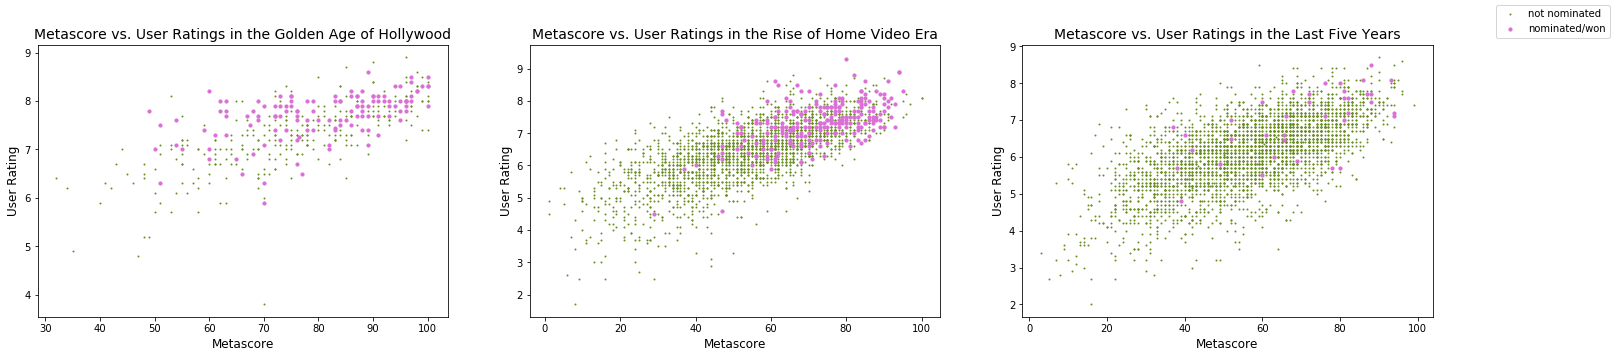

In [124]:
fig2, (ax2, ax3, ax4) = plt.subplots(1,3, figsize=[25,5])

# golden age
test_golden = merge_golden
lame_movies_golden = test_golden[test_golden['Winner'] == 0]
good_movies_golden = test_golden[test_golden['Winner'] != 0]
ax2.scatter(lame_movies_golden['metascore'], lame_movies_golden['avg_vote'], s=1, color='olivedrab')
ax2.scatter(good_movies_golden['metascore'], good_movies_golden['avg_vote'], s=10, color='orchid')
ax2.set_title('Metascore vs. User Ratings in the Golden Age of Hollywood', fontsize=14)
ax2.set_xlabel('Metascore', fontsize=12)
ax2.set_ylabel('User Rating', fontsize=12)

# rise of home videos
test_home = merge_home
lame_movies_home = test_home[test_home['Winner'] == 0]
good_movies_home = test_home[test_home['Winner'] != 0]
ax3.scatter(lame_movies_home['metascore'], lame_movies_home['avg_vote'], s=1, color='olivedrab')
ax3.scatter(good_movies_home['metascore'], good_movies_home['avg_vote'], s=10, color='orchid')
ax3.set_title('Metascore vs. User Ratings in the Rise of Home Video Era', fontsize=14)
ax3.set_xlabel('Metascore', fontsize=12)
ax3.set_ylabel('User Rating', fontsize=12)

# last 5 years
test_now = merge_now
lame_movies_now = test_now[test_now['Winner'] == 0]
good_movies_now = test_now[test_now['Winner'] != 0]
ax4.scatter(lame_movies_now['metascore'], lame_movies_now['avg_vote'], s=1, color='olivedrab')
ax4.scatter(good_movies_now['metascore'], good_movies_now['avg_vote'], s=10, color='orchid')
ax4.set_title('Metascore vs. User Ratings in the Last Five Years', fontsize=14)
ax4.set_xlabel('Metascore', fontsize=12)
ax4.set_ylabel('User Rating', fontsize=12)

fig2.legend(['not nominated', 'nominated/won'], loc='upper right')

In [ ]:
#something to consider: movies being nominated for more awards? so less datapoints
# see average number of nominations per movie per time period

